# Phase 3 – Overfitting the Cardiovascular Dataset
Tori St. John

### Goal
Train several neural networks on 100% of the dataset (no train/validation split) and grow the model size until the network overfits (≈100% accuracy).

In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf

print("TF version:", tf.__version__)



csv_path = "data/cardio_train 2.csv"
df = pd.read_csv(csv_path, sep=";")

# Convert age to years
if "age_years" not in df.columns:
    df["age_years"] = df["age"] / 365.25

# Select features and label
feature_cols = ["age_years", "ap_hi", "ap_lo", "cholesterol", "gluc", "smoke", "alco", "active"]
X = df[feature_cols].values
y = df["cardio"].values

print("Loaded X shape:", X.shape, " y shape:", y.shape)
print("Example rows:")
display(df.head())

2025-11-29 14:16:40.359502: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


TF version: 2.16.2
Loaded X shape: (70000, 8)  y shape: (70000,)
Example rows:


,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,age_years
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0,50.357290
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1,55.381246
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1,51.627652
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1,48.249144
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0,47.841205


In [2]:
# scaling (MinMax)
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

# quick check
print("Scaled feature min, max (per column):", X_scaled.min(axis=0), X_scaled.max(axis=0))

Scaled feature min, max (per column): [0. 0. 0. 0. 0. 0. 0. 0.] [1. 1. 1. 1. 1. 1. 1. 1.]


In [3]:
def compile_and_fit(model, X, y, epochs=200, batch_size=32, verbose=0):
    model.compile(optimizer='adam',
                  loss='binary_crossentropy',
                  metrics=['accuracy'])
    history = model.fit(X, y, epochs=epochs, batch_size=batch_size, verbose=verbose)
    return history

def plot_history(history, title=None, save_path=None):
    plt.figure(figsize=(6,3))
    plt.plot(history.history['accuracy'], label='accuracy')
    plt.plot(history.history['loss'], label='loss')
    plt.xlabel('Epoch')
    plt.ylabel('Value')
    if title:
        plt.title(title)
    plt.legend()
    plt.tight_layout()
    if save_path:
        plt.savefig(save_path, dpi=150)
    plt.show()

/Users/victoriast.john/.pyenv/versions/3.11.13/lib/python3.11/site-packages/keras/src/layers/core/dense.py:95: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/50
547/547 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.5492 - loss: 0.6934
Epoch 2/50
547/547 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6092 - loss: 0.6675
Epoch 3/50
547/547 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.6119 - loss: 0.6597
Epoch 4/50
547/547 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.6156 - loss: 0.6555
Epoch 5/50
547/547 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.6192 - loss: 0.6528
Epoch 6/50
547/547 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6211 - loss: 0.6510
Epoch 7/50
547/547 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6239 - loss: 0.6496
Epoch 8/50
547/547 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6228 - loss: 0.6486
Epoch 9/50
547/547 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6247 - loss: 0.6477
Epoch 10/50
547/547 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6262 - loss: 0.6470
Epoch 11/50
547/547 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6273 - loss: 0.6464
Epoch 12/50
547/547 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step

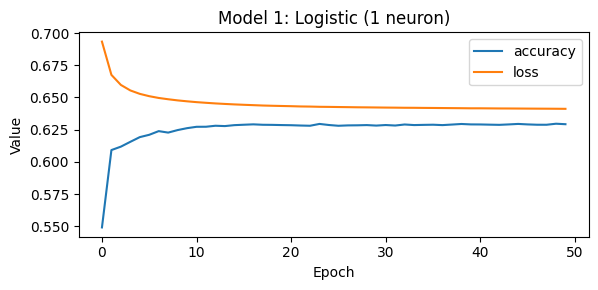

In [4]:
# Model 1: logistic regression (1 neuron)
model1 = tf.keras.Sequential([
    tf.keras.layers.Dense(1, activation='sigmoid', input_shape=(X_scaled.shape[1],))
])

history1 = compile_and_fit(model1, X_scaled, y, epochs=50, batch_size=128, verbose=1)
print("Model1 final acc:", history1.history['accuracy'][-1])

plot_history(history1, title="Model 1: Logistic (1 neuron)", save_path="plots/model1_accuracy.png")

Epoch 1/50
547/547 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.5594 - loss: 0.6826
Epoch 2/50
547/547 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.5867 - loss: 0.6722
Epoch 3/50
547/547 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.5887 - loss: 0.6668
Epoch 4/50
547/547 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.5947 - loss: 0.6591
Epoch 5/50
547/547 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.6167 - loss: 0.6535
Epoch 6/50
547/547 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.6259 - loss: 0.6499
Epoch 7/50
547/547 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.6273 - loss: 0.6474
Epoch 8/50
547/547 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.6282 - loss: 0.6457
Epoch 9/50
547/547 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.6283 - loss: 0.6446
Epoch 10/50
547/547 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.6285 - loss: 0.6437
Epoch 11/50
547/547 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.6285 - loss: 0.6433
Epoch 12/50
547/547 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step

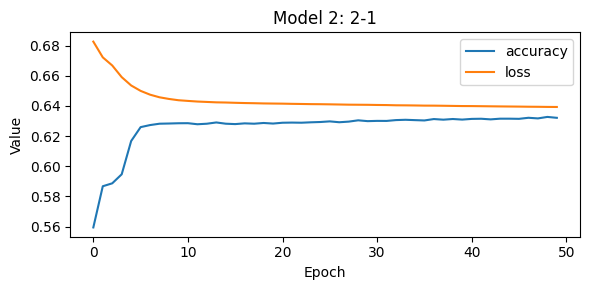

In [5]:
# Model 2: small MLP (2 neurons)
model2 = tf.keras.Sequential([
    tf.keras.layers.Dense(2, activation='relu', input_shape=(X_scaled.shape[1],)),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

history2 = compile_and_fit(model2, X_scaled, y, epochs=50, batch_size=128, verbose=1)
print("Model2 final acc:", history2.history['accuracy'][-1])

plot_history(history2, title="Model 2: 2-1", save_path="plots/model2_accuracy.png")

Epoch 1/50


/Users/victoriast.john/.pyenv/versions/3.11.13/lib/python3.11/site-packages/keras/src/layers/core/dense.py:95: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


547/547 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.6016 - loss: 0.6643
Epoch 2/50
547/547 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6273 - loss: 0.6451
Epoch 3/50
547/547 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.6289 - loss: 0.6420
Epoch 4/50
547/547 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.6296 - loss: 0.6406
Epoch 5/50
547/547 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6309 - loss: 0.6395
Epoch 6/50
547/547 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6303 - loss: 0.6386
Epoch 7/50
547/547 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6321 - loss: 0.6381
Epoch 8/50
547/547 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6340 - loss: 0.6372
Epoch 9/50
547/547 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6333 - loss: 0.6369
Epoch 10/50
547/547 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6355 - loss: 0.6362
Epoch 11/50
547/547 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6354 - loss: 0.6356
Epoch 12/50
547/547 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy

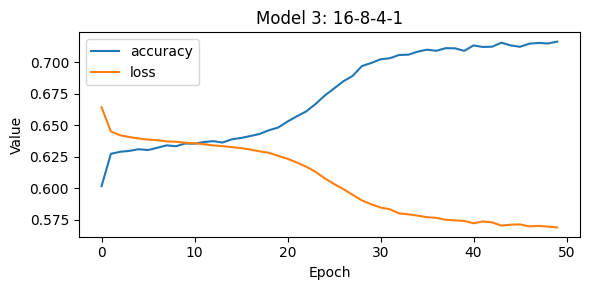

In [6]:
# Model 3: larger MLP
model3 = tf.keras.Sequential([
    tf.keras.layers.Dense(16, activation='relu', input_shape=(X_scaled.shape[1],)),
    tf.keras.layers.Dense(8, activation='relu'),
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

history3 = compile_and_fit(model3, X_scaled, y, epochs=50, batch_size=128, verbose=1)
print("Model3 final acc:", history3.history['accuracy'][-1])

plot_history(history3, title="Model 3: 16-8-4-1", save_path="plots/model3_accuracy.png")

Epoch 1/50


/Users/victoriast.john/.pyenv/versions/3.11.13/lib/python3.11/site-packages/keras/src/layers/core/dense.py:95: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


547/547 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.6133 - loss: 0.6532
Epoch 2/50
547/547 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6289 - loss: 0.6416
Epoch 3/50
547/547 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6306 - loss: 0.6395
Epoch 4/50
547/547 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6313 - loss: 0.6380
Epoch 5/50
547/547 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.6332 - loss: 0.6369
Epoch 6/50
547/547 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6334 - loss: 0.6359
Epoch 7/50
547/547 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6357 - loss: 0.6348
Epoch 8/50
547/547 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6353 - loss: 0.6337
Epoch 9/50
547/547 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6380 - loss: 0.6326
Epoch 10/50
547/547 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6406 - loss: 0.6310
Epoch 11/50
547/547 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6441 - loss: 0.6279
Epoch 12/50
547/547 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy

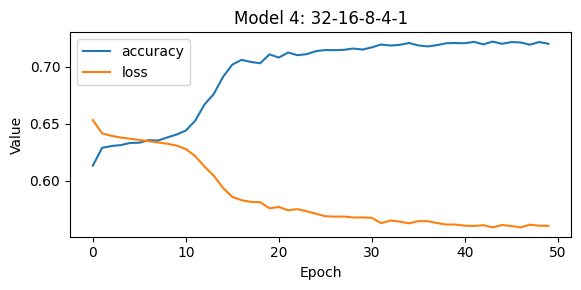

In [7]:
# Model 4: bigger
model4 = tf.keras.Sequential([
    tf.keras.layers.Dense(32, activation='relu', input_shape=(X_scaled.shape[1],)),
    tf.keras.layers.Dense(16, activation='relu'),
    tf.keras.layers.Dense(8, activation='relu'),
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

history4 = compile_and_fit(model4, X_scaled, y, epochs=50, batch_size=128, verbose=1)
print("Model4 final acc:", history4.history['accuracy'][-1])
plot_history(history4, title="Model 4: 32-16-8-4-1", save_path="plots/model4_accuracy.png")

/Users/victoriast.john/.pyenv/versions/3.11.13/lib/python3.11/site-packages/keras/src/layers/core/dense.py:95: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/50
547/547 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.6148 - loss: 0.6515
Epoch 2/50
547/547 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.6281 - loss: 0.6418
Epoch 3/50
547/547 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.6313 - loss: 0.6392
Epoch 4/50
547/547 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.6321 - loss: 0.6374
Epoch 5/50
547/547 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6356 - loss: 0.6363
Epoch 6/50
547/547 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6365 - loss: 0.6343
Epoch 7/50
547/547 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6379 - loss: 0.6320
Epoch 8/50
547/547 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6433 - loss: 0.6276
Epoch 9/50
547/547 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.6548 - loss: 0.6194
Epoch 10/50
547/547 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6774 - loss: 0.6030
Epoch 11/50
547/547 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6885 - loss: 0.5936
Epoch 12/50
547/547 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step

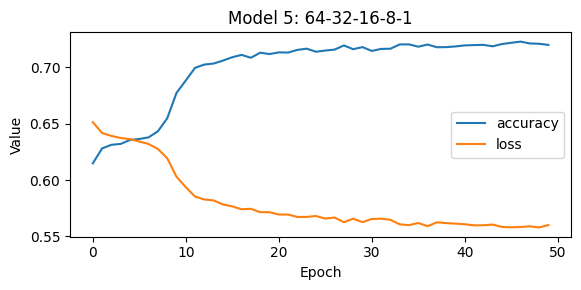

In [8]:
# Model 5: bigger!
model5 = tf.keras.Sequential([
    tf.keras.layers.Dense(64, activation='relu', input_shape=(X_scaled.shape[1],)),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(16, activation='relu'),
    tf.keras.layers.Dense(8, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

history5 = compile_and_fit(model5, X_scaled, y, epochs=50, batch_size=128, verbose=1)
print("Model5 final acc:", history5.history['accuracy'][-1])

plot_history(history5, title="Model 5: 64-32-16-8-1", save_path="plots/model5_accuracy.png")

In [9]:
results = {
    "Model 1 (1)": history1.history['accuracy'][-1],
    "Model 2 (2-1)": history2.history['accuracy'][-1],
    "Model 3 (16-8-4-1)": history3.history['accuracy'][-1],
    "Model 4 (32-16-8-4-1)": history4.history['accuracy'][-1],
    "Model 5 (64-32-16-8-1)": history5.history['accuracy'][-1],
}

print("Final accuracies (training on 100% data):")
for k,v in results.items():
    print(f"{k}: {v:.4f}")

Final accuracies (training on 100% data):
Model 1 (1): 0.6293
Model 2 (2-1): 0.6321
Model 3 (16-8-4-1): 0.7165
Model 4 (32-16-8-4-1): 0.7202
Model 5 (64-32-16-8-1): 0.7200


In [10]:
open("plots/model3_summary.txt","w").write(model3.to_json())

3964